In [55]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
finviz_url= 'https://finviz.com/quote.ashx?t='
tickers = ['FRSX']

In [134]:
news_tables= {}

for ticker in tickers:
    url= finviz_url + ticker
    
    req= Request(url=url, headers={'user-agent': 'my-app'})
    response= urlopen(req)
    
    html= BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [135]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

news_score = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
news_score['date'] = pd.to_datetime(news_score.date).dt.date

In [136]:
import datetime
d1= datetime.date(2021,1,31)
news_score_range= news_score[news_score.date > d1]

In [137]:
# New words and values for evaluating sentiment in headlines
new_words = {
    'crushes': 50,
    'beats': 20,
    'misses': -20,
    'trouble': -10,
    'falls': -100,
    'merger': +50,
    'acquisition': +50,
    'finalizes': +100,
    'law firm': -20,
    'new': +20,
    'problem': -20,
    'partnership': +100
}

vader = SentimentIntensityAnalyzer()

#Update analyzer with new words
vader.lexicon.update(new_words)

In [138]:
#Apply vader function to News Title and create 'compound' value column

f = lambda title: vader.polarity_scores(title)['compound']
news_score['compound'] = news_score['title'].apply(f)

In [139]:
news_score.head(20)

,ticker,date,time,title,compound
0,FRSX,2021-02-08,08:30AM,Foresight: Eye-Net and a Top Multinational Eur...,0.2023
1,FRSX,2021-02-02,08:30AM,Foresight: Eye-Net Partners with Wunder Mobili...,0.3182
2,FRSX,2021-01-26,03:46PM,What's Driving Foresight Autonomous Shares 17%...,0.2960
3,FRSX,2021-01-25,08:30AM,Foresight Received Chinese Patent Notice of Al...,0.0000
4,FRSX,2021-01-14,10:25AM,"Company News for Jan 14, 2021",0.0000
5,FRSX,2021-01-13,08:30AM,Foresight: Eye-Net Initiates Pilot Project wit...,0.2023
6,FRSX,2021-01-11,08:30AM,Foresight to Present at CES 2021 Virtual Confe...,0.0000
7,FRSX,2020-12-28,08:30AM,Foresight Autonomous Holdings Prices $26 Milli...,0.0000
8,FRSX,2020-12-23,10:43AM,FRSX Stock: 6 Things to Know About AV Play For...,0.3400
9,FRSX,2020-12-16,08:30AM,Foresight Partners with University of Michigan...,0.2500


<AxesSubplot:xlabel='date'>

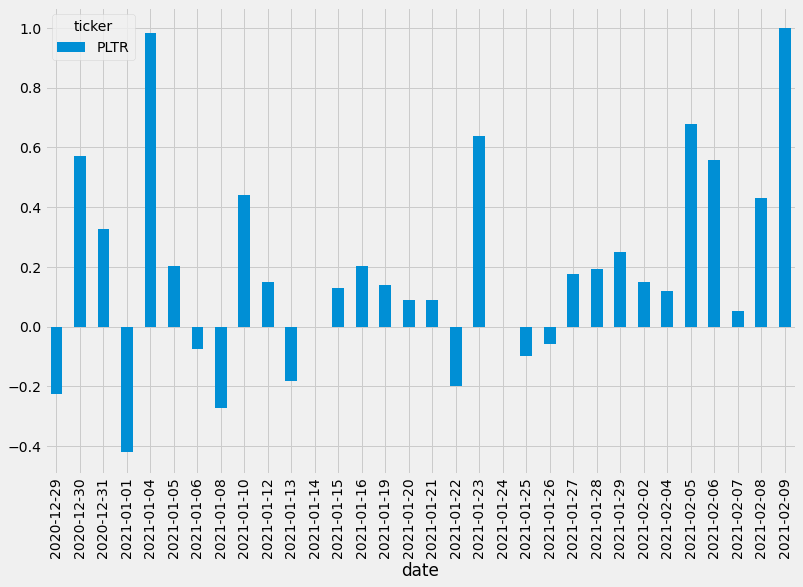

In [132]:
plt.style.use("fivethirtyeight")

mean_ns= news_score.groupby(['date', 'ticker']).mean().unstack()
mean_ns= mean_ns.xs('compound', axis="columns")
mean_ns.plot.bar(figsize= (12, 8))

In [ ]:
#Sentiment on single trading day and stock
